In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import preprocessing
import postprocessing
import algorithms
import utils
import plots

In [2]:
DATA_PATH_1 = Path("../data/data.mat")
DATA_PATH_2 = Path("../data/weights.mat")

# Part 1

## Neural Networks
In the previous exercise, you implemented feedforward propagation for neural networks and used it to predict handwritten digits with the weights we provided. In this exercise, you will implement the backpropagation algorithm 
to learn the parameters for the neural network.

In [3]:
x, y = preprocessing.read_data(DATA_PATH_1)
theta = preprocessing.read_weights(DATA_PATH_2, ["Theta1", "Theta2"])

## Visualizing the data
In the first part of ex4.m, the code will load the data and display it on a 2-dimensional plot (Figure 1) by calling the function displayData. This is the same dataset that you used in the previous exercise. There are
5000 training examples in ex3data1.mat, where each training example is a 20 pixel by 20 pixel grayscale image of the digit. Each pixel is represented by a floating point number indicating the grayscale intensity at that location.
The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. Each of these training examples becomes a single row in our data matrix X. This gives us a 5000 by 400 matrix X where every row is a training example for a handwritten digit image.

$$
X = \begin{bmatrix}
  -(x^{(1)})^T- \\
  -(x^{(2)})^T- \\
  \vdots \\
  -(x^{(m)})^T- \\
\end{bmatrix}
$$

The second part of the training set is a 5000-dimensional vector y that contains labels for the training set. To make things more compatible with Octave/MATLAB indexing, where there is no zero index, we have mapped the digit zero to the value ten. Therefore, a “0” digit is labeled as “10”, while the digits “1” to “9” are labeled as “1” to “9” in their natural order.

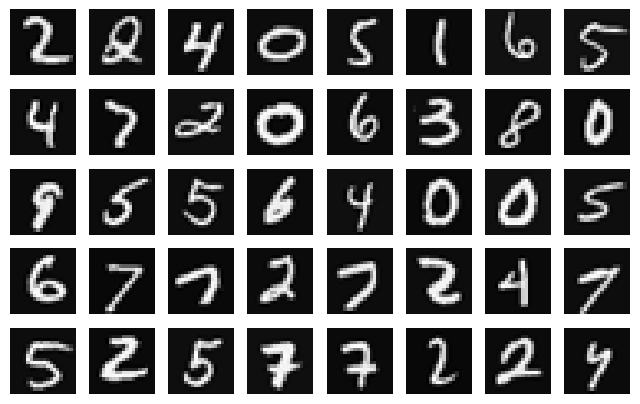

In [4]:
n = 40
random_indices = utils.select_n_random_rows(x, n)
plots.display_grid_of_rows(x, random_indices)

## Preprocessing

Prepend a column of ones to the input array and map the labels to a range from 0 to 9.

In [5]:
x = preprocessing.include_intercept(x)
y = preprocessing.map_labels(y)

## Model representation
Our neural network is shown in Figure 2. It has 3 layers – an input layer, a hidden layer and an output layer. 
Recall that our inputs are pixel values of digit images. Since the images are of size 20 × 20, this gives us 400 input layer units (not counting the extra bias unit which always outputs +1). The training data will be loaded into the variables X and y by the ex4.m script.
You have been provided with a set of network parameters (Θ(1) , Θ(2) ) already trained by us. These are stored in ex4weights.mat and will be loaded by ex4.m into Theta1 and Theta2. The parameters have dimensions that are sized for a neural network with 25 units in the second layer and 10 output units (corresponding to the 10 digit classes).

In [6]:
input_layer_size = 400
hidden_layer_size = 25
output_layer_size = 10
model = algorithms.NeuralNetwork(input_layer_size, hidden_layer_size, output_layer_size)

## Feedforward and cost function
Now you will implement the cost function and gradient for the neural network. First, complete the code in nnCostFunction.m to return the cost. Recall that the cost function for the neural network (without regulariza-
tion) is

$$J(\Theta) = -\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K}[ y_k^{(i)} \log{(h_{\theta}(x^{(i)}))}_k + (1- y_k^{(i)}) \log(1 - {(h_{\theta} (x^{(i)}))}_k)]$$

where $h_{\theta}(x^{(i)})$ is computed as shown in the Figure 2 and K = 10 is the total
(3) number of possible labels. Note that $h_{\theta}(x^{(i)})_k = a_k$ is the activation (output value) of the k-th output unit. Also, recall that whereas the original labels
(in the variable y) were 1, 2, ..., 10, for the purpose of training a neural
network, we need to recode the labels as vectors containing only values 0 or
1, so that

$$
y = \begin{bmatrix}
  1 \\
  0 \\
  \vdots \\
  0 \\
\end{bmatrix}
, ...
\begin{bmatrix}
  0 \\
  0 \\
  \vdots \\
  1 \\
\end{bmatrix}
$$

For example, if $x^{(i)}$ is an image of the digit 5, then the corresponding $y^{(i)}$ (that you should use with the cost function) should be a 10-dimensional vector with $y^5 = 1$, and the other elements equal to 0.
You should implement the feedforward computation that computes $h_{\theta}(x^{(i)})$ for every example i and sum the cost over all examples. Your code should also work for a dataset of any size, with any number of labels (you can assume that there are always at least $K \ge 3$ labels).

Once you are done, ex4.m will call your nnCostFunction using the loaded et of parameters for Theta1 and Theta2. You should see that the cost is bout 0.287629.

In [7]:
model.theta_1 = theta[0]
model.theta_2 = theta[1]

In [8]:
# expected answer 0.29
print("Part 1:\n")
print("Computed cost with theta loaded from weights.mat file:\n")
print(f"{model.cost(x, y): .2f}\n")

Part 1:

Computed cost with theta loaded from weights.mat file:

 0.29



## Regularized cost function
The cost function for neural networks with regularization is given by

$$J(\Theta) = -\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K}[ y_k^{(i)} \log{(h_{\theta}(x^{(i)}))}_k + (1- y_k^{(i)}) \log(1 - {(h_{\theta} (x^{(i)}))}_k)] +  \frac{\lambda}{2m} [\sum_{j=1}^{25} \sum_{k=1}^{400} (\Theta^{(1)}_{jk})^2] + \sum_{j=1}^{10} \sum_{k=1}^{25} (\Theta^{(2)}_{jk})^2]$$

You can assume that the neural network will only have 3 layers an input
layer, a hidden layer and an output layer. However, your code should work
for any number of input units, hidden units and outputs units. While we
have explicitly listed the indices above for $\Theta^{(1)}$ and $\Theta^{(2)}$ for clarity, do note that your code should in general work with $\Theta^{(1)}$ and $\Theta^{(2)}$ of any size.

Note that you should not be regularizing the terms that correspond to
the bias. For the matrices Theta1 and Theta2, this corresponds to the first
column of each matrix. You should now add regularization to your cost
function. Notice that you can first compute the unregularized cost function
J using your existing nnCostFunction.m and then later add the cost for the
regularization terms.

Once you are done, ex4.m will call your nnCostFunction using the loaded
set of parameters for Theta1 and Theta2, and $\lambda = 1$. You should see that
the cost is about 0.383770.

In [9]:
# expected answer 0.38
model._lambda = 1
print("Computed cost with regularization parameter (lambda=1):\n")
print(f"{model.cost(x, y): .2f}\n")

Computed cost with regularization parameter (lambda=1):

 0.38



# Part 2

## Backpropagation
In this part of the exercise, you will implement the backpropagation algorithm to compute the gradient for the neural network cost function. You
will need to complete the nnCostFunction.m so that it returns an approprtate value for grad. Once you have computed the gradient, you will be able
to train the neural network by minimizing the cost function J(Θ) using an advanced optimizer such as fmincg.
You will first implement the backpropagation algorithm to compute the gradients for the parameters for the (unregularized) neural network.

In [10]:
x, y = preprocessing.read_data(DATA_PATH_1)
x = preprocessing.include_intercept(x)
y = preprocessing.map_labels(y)

## Sigmoid gradient
To help you get started with this part of the exercise, you will first implement the sigmoid gradient function. The gradient for the sigmoid function can be computed as

$$g'(z)=\frac{d}{dz}g(z)=g(z)(1-g(z))$$

where

$$g(z)=\frac{1}{1+e^{-z}}$$

When you are done, try testing a few values by calling sigmoidGradient(z) at the Octave/MATLAB command line. For large values (both positive and negative) of z, the gradient should be close to 0. When z = 0, the gradient should be exactly 0.25. Your code should also work with vectors and matrices. For a matrix, your function should perform the sigmoid gradient function on every element.

## Random initialization
When training neural networks, it is important to randomly initialize the parameters for symmetry breaking. One effective strategy for random initialization is to randomly select values for $\Theta^{(l)}$ uniformly in the range $[−\epsilon_{init} ,\epsilon_{init}]$.
You should use $\epsilon_{init} = 0.12$ This range of values ensures that the parameters are kept small and makes the learning more efficient. Your job is to complete randInitializeWeights.m to initialize the weights for $\theta$.

In [17]:
input_layer_size = 400
hidden_layer_size = 25
output_layer_size = 10
model = algorithms.NeuralNetwork(input_layer_size, hidden_layer_size, output_layer_size, 12)

## Backpropagation
Now, you will implement the backpropagation algorithm. Recall that the intuition behind the backpropagation algorithm is as follows. Given a training example $(x^{(t)}, y^{(t)})$, we will first run a “forward pass” to compute all the activations throughout the network, including the output value of the hypothesis $h_{\theta}(x)$. Then, for each node j in layer l, we would like to compute an “error term” $\delta_j^{(l)}$ that measures how much that node was “responsible” for any errors in our output.

For an output node, we can directly measure the difference between the network’s activation and the true target value, and use that to define $\delta_j^{(3)}$ (since layer 3 is the output layer). For the hidden units, you will compute $\delta_j^{(l)}$ based on a weighted average of the error terms of the nodes in layer $(l + 1)$.

1. Set the input layer’s values $(a^{(1)})$ to the t-th training example $x^{(t)}$.
Perform a feedforward pass (Figure 2), computing the activations $(z^{(2)}, a^{(2)}, z^{(3)}, a^{(3)})$
for layers 2 and 3. Note that you need to add a +1 term to ensure that the vectors of activations for layers $a^{(1)}$ and $a^{(2)}$ also include the bias unit. In Octave/MATLAB, if $a_1$ is a column vector, adding one corre- sponds to $a_1 = [1 ; a_1]$.
2. For each output unit k in layer 3 (the output layer), set

$$\delta_k^{(3)} = (a_k^{(3)} − y_k )$$

where $y_k \in {0, 1}$ indicates whether the current training example belongs to class $k (y_k = 1)$, or if it belongs to a different class $(y_k = 0)$.
You may find logical arrays helpful for this task (explained in the previous programming exercise).
3. For the hidden layer $l = 2$, set

$$\delta^{(2)} = (\Theta^{(2)})^T\delta^{(3)} \cdot g ' (z^{(2)} )$$

4. Accumulate the gradient from this example using the following formula. Note that you should skip or remove $\delta_{\theta}$. In Octave/MATLAB, removing $\delta_{\theta}$ corresponds to delta 2 = delta 2(2:end).

$$\Delta^{(l)} = \Delta^{(l)} + \delta^{(l+1)} (a^{(l)} )^T$$

5. Obtain the (unregularized) gradient for the neural network cost func-
tion by dividing the accumulated gradients by $\frac{1}{m}$:

$$\frac{\delta}{\delta \Theta_{ij}^{(l)}} J(\Theta)= D_{ij}^{(l)}=\frac{1}{m}\Delta_{ij}^{(l)}$$

## Gradient checking
In your neural network, you are minimizing the cost function $J(\theta)$. To perform gradient checking on your parameters, you can imagine “unrolling” the parameters $\theta^{(1)}$ , $\theta^{(2)}$ into a long vector $\theta$. By doing so, you can think of the cost function being $J(\theta)$ instead and use the following gradient checking procedure.

Suppose you have a function $f_i(\theta)$ that purportedly computes $\frac{\delta}{\delta \theta} J(\theta)$; you’d like to check if fi is outputting correct derivative values.

$$
\theta^{(i+)} = \theta_+\begin{bmatrix}
  0 \\
  0 \\
  \vdots \\
  \epsilon \\
  \vdots \\
  0 \\
\end{bmatrix}
$$

$$
\theta^{(i-)} = \theta_-\begin{bmatrix}
  0 \\
  0 \\
  \vdots \\
  \epsilon \\
  \vdots \\
  0 \\
\end{bmatrix}
$$

So, $\theta^{(i+)}$ is the same as $\theta$, except its i-th element has been incremented by $\epsilon$. Similarly, $\theta^{(i-)}$ is the corresponding vector with the i-th element decreased by $\epsilon$. You can now numerically verify $f_i(\theta)$’s correctness by checking, for each $i$, that:

$$f_i(\theta)=\frac{J(\theta^{(i+)})-J(\theta^{(i-)})}{2\epsilon}$$

The degree to which these two values should approximate each other will depend on the details of J. But assuming $\epsilon = 10^{−4}$, you’ll usually find that the left- and right-hand sides of the above will agree to at least 4 significant digits (and often many more).

We have implemented the function to compute the numerical gradient for you in computeNumericalGradient.m. While you are not required to modify the file, we highly encourage you to take a look at the code to understand how it works.

## Learning parameters using fmincg
After you have successfully implemented the neural network cost function and gradient computation, the next step of the ex4.m script will use fmincg to learn a good set parameters.

After the training completes, the ex4.m script will proceed to report the training accuracy of your classifier by computing the percentage of examples it got correct. If your implementation is correct, you should see a reported training accuracy of about 95.3% (this may vary by about 1% due to the random initialization). It is possible to get higher training accuracies by training the neural network for more iterations. We encourage you to try training the neural network for more iterations (e.g., set MaxIter to 400) and also vary the regularization parameter $\lambda$. With the right learning settings, it is possible to get the neural network to perfectly fit the training set.

In [18]:
model.fit(x,y)

In [20]:
# expected answer 96.98
print("Part 2:\n")
print("Training set accuracy:\n")
accuracy = postprocessing.accuracy(x, y, model)
print(f"{accuracy: .3f}\n")

Part 2:

Training set accuracy:

 0.752

